Importando Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importado Datasets

In [2]:
df1=pd.read_csv('/content/users_202007072128.csv',parse_dates=['created_at'])
df1.head(2)

,user_id,user_name,name,description,url,created_at,geo_enabled,verified,profile_image_url,profile_image_url_large,followers_count,friends_count,listed_count,favourites_count,statuses_count,media_count,pinned_tweet,tweets_scraped,tweets_scraped_at,scrapped_at,ignore
0,1000028381906382848,b10_julian,Juli⚽,Vélez Sarsfield/Villa Guillermina ...,https://t.co/jYboxTgR2D,2018-05-25 14:58:40,0,0,https://pbs.twimg.com/profile_images/126945596...,https://pbs.twimg.com/profile_images/126945596...,92,164,0,4654,1019,29,1.237890e+18,0,NaN,2020-07-07 05:32:41.0,0
1,1000052612186722304,LibPeronistas,Libros Peronistas,Libros escolares publicados durante la segunda...,https://t.co/lV1PZq2LPy,2018-05-25 16:34:57,0,0,https://pbs.twimg.com/profile_images/100072396...,https://pbs.twimg.com/profile_images/100072396...,405,184,1,1101,999,237,NaN,0,NaN,2020-07-07 14:08:01.0,0


In [3]:
df1.shape

(109581, 21)

In [4]:
df2=pd.read_csv('/content/tweets_202007072142.csv',parse_dates=['created_at'])
df2.head(2)

,tweet_id,conversation_id,user_id,created_at,lang,retweet_count,favorite_count,reply_count,quote_count,is_reply,replied_id,replied_user_id,is_quote,quoted_id,full_text,source,scrapped_at,user_mentions_count,hashtags_count,urls_count,media_count,replied_original
0,1000000284486139904,1000000284486139904,2841506345,2018-05-25 13:07:01,es,23,124,5,1,0,NaN,NaN,0,NaN,Feliz día de la patria para todos los cordobes...,Twitter for Android,2020-07-07 11:42:04.0,0,0,0,3,NaN
1,1000000308003696640,1000000284486139904,2841506345,2018-05-25 13:07:07,es,24,83,12,0,1,1.000000e+18,2.841506e+09,0,NaN,#25deMayo Es un día en el que todos tenemos qu...,Twitter for Android,2020-07-07 11:42:04.0,0,1,0,2,1.0


In [5]:
print(df2.shape)

(2474317, 22)


Clasificando los usuarios segun la cantidad de seguidores

In [6]:
MI=df1[(df1['followers_count']<10000) & (df1['followers_count']>1000)] #micoinfluencers entre 1000 y 10000 seguidores
Inf=df1[(df1['followers_count']<100000) & (df1['followers_count']>10000)]#Influencers entre 10000 y 100000 seguidores
MA=df1[df1['followers_count']>100000]#Macroinfluencers mayor a 100000 seguidores
print("El dataset de usuarios tiene {} Microinfluencers".format(MI.shape[0]))
print("El dataset de usuarios tiene {} Influencers".format(Inf.shape[0]))
print("El dataset de usuarios tiene {} Macroinfluencers".format(MA.shape[0]))

El dataset de usuarios tiene 35745 Microinfluencers
El dataset de usuarios tiene 14376 Influencers
El dataset de usuarios tiene 6314 Macroinfluencers


Usuario mas popular

In [48]:
df1['followers_count'].values.max()

120453390

In [49]:
Most_popular=df1.loc[df1['followers_count']==120453390]
Most_popular[['user_id', 'user_name', 'name']]

,user_id,user_name,name
96583,813286,BarackObama,Barack Obama


Mergeando Tweets con sus respectivos usuarios

In [7]:
#df1[df1['user_id']==2841506345]

In [8]:
#df2[df2['user_id']==2841506345]

In [9]:
df_merge = pd.merge(df1, df2, on='user_id', how='outer')
df_merge.head(2)

,user_id,user_name,name,description,url,created_at_x,geo_enabled,verified,profile_image_url,profile_image_url_large,followers_count,friends_count,listed_count,favourites_count,statuses_count,media_count_x,pinned_tweet,tweets_scraped,tweets_scraped_at,scrapped_at_x,ignore,tweet_id,conversation_id,created_at_y,lang,retweet_count,favorite_count,reply_count,quote_count,is_reply,replied_id,replied_user_id,is_quote,quoted_id,full_text,source,scrapped_at_y,user_mentions_count,hashtags_count,urls_count,media_count_y,replied_original
0,1000028381906382848,b10_julian,Juli⚽,Vélez Sarsfield/Villa Guillermina ...,https://t.co/jYboxTgR2D,2018-05-25 14:58:40,0,0,https://pbs.twimg.com/profile_images/126945596...,https://pbs.twimg.com/profile_images/126945596...,92,164,0,4654,1019,29,1.237890e+18,0,NaN,2020-07-07 05:32:41.0,0,1.274194e+18,1.274194e+18,2020-06-20 04:13:46,es,5.0,20.0,2.0,0.0,0.0,NaN,NaN,1.0,1.274135e+18,Unas ganas de que me pase:(\n@JoseLChilavert_,Twitter for Android,2020-07-07 05:32:47.0,1.0,0.0,0.0,0.0,NaN
1,1000052612186722304,LibPeronistas,Libros Peronistas,Libros escolares publicados durante la segunda...,https://t.co/lV1PZq2LPy,2018-05-25 16:34:57,0,0,https://pbs.twimg.com/profile_images/100072396...,https://pbs.twimg.com/profile_images/100072396...,405,184,1,1101,999,237,NaN,0,NaN,2020-07-07 14:08:01.0,0,1.272325e+18,1.272307e+18,2020-06-15 00:28:22,es,3.0,9.0,7.0,1.0,1.0,1.272307e+18,177612041.0,0.0,NaN,@MargaWirkierman @LegadoPeron @horaciorlarreta...,Twitter for iPhone,2020-07-07 14:08:04.0,3.0,0.0,0.0,0.0,1.0


In [10]:
#df_merge[df_merge['user_id']==2841506345]

In [11]:
df_merge.columns

Index(['user_id', 'user_name', 'name', 'description', 'url', 'created_at_x',
       'geo_enabled', 'verified', 'profile_image_url',
       'profile_image_url_large', 'followers_count', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'media_count_x',
       'pinned_tweet', 'tweets_scraped', 'tweets_scraped_at', 'scrapped_at_x',
       'ignore', 'tweet_id', 'conversation_id', 'created_at_y', 'lang',
       'retweet_count', 'favorite_count', 'reply_count', 'quote_count',
       'is_reply', 'replied_id', 'replied_user_id', 'is_quote', 'quoted_id',
       'full_text', 'source', 'scrapped_at_y', 'user_mentions_count',
       'hashtags_count', 'urls_count', 'media_count_y', 'replied_original'],
      dtype='object')

In [12]:
df_merge.shape

(2475037, 42)

Determinando el porcentaje de datos nulos por columnas

In [13]:
for i in df_merge.columns:
    print("La columna",i, "tiene",round((df_merge[i].isnull().sum()*100)/len(df_merge[i]),3),"% de valores nulos")

La columna user_id tiene 0.0 % de valores nulos
La columna user_name tiene 0.0 % de valores nulos
La columna name tiene 0.0 % de valores nulos
La columna description tiene 3.007 % de valores nulos
La columna url tiene 25.397 % de valores nulos
La columna created_at_x tiene 0.0 % de valores nulos
La columna geo_enabled tiene 0.0 % de valores nulos
La columna verified tiene 0.0 % de valores nulos
La columna profile_image_url tiene 0.0 % de valores nulos
La columna profile_image_url_large tiene 0.0 % de valores nulos
La columna followers_count tiene 0.0 % de valores nulos
La columna friends_count tiene 0.0 % de valores nulos
La columna listed_count tiene 0.0 % de valores nulos
La columna favourites_count tiene 0.0 % de valores nulos
La columna statuses_count tiene 0.0 % de valores nulos
La columna media_count_x tiene 0.0 % de valores nulos
La columna pinned_tweet tiene 52.403 % de valores nulos
La columna tweets_scraped tiene 0.0 % de valores nulos
La columna tweets_scraped_at tiene 20.91

Limpieza del nuevo dataset

In [14]:
max_null=[]
for i in df_merge.columns:
  if (df_merge[i].isnull().sum()*100)/len(df_merge[i]) >20:
    max_null.append(i)
print(max_null)

['url', 'pinned_tweet', 'tweets_scraped_at', 'replied_id', 'replied_user_id', 'quoted_id', 'replied_original']


In [15]:
df_merge.drop(max_null,axis=1, inplace = True)
#df1.drop([[0, 4, 2]], axis = 1, inplace = True) 
df_merge.head(2)

,user_id,user_name,name,description,created_at_x,geo_enabled,verified,profile_image_url,profile_image_url_large,followers_count,friends_count,listed_count,favourites_count,statuses_count,media_count_x,tweets_scraped,scrapped_at_x,ignore,tweet_id,conversation_id,created_at_y,lang,retweet_count,favorite_count,reply_count,quote_count,is_reply,is_quote,full_text,source,scrapped_at_y,user_mentions_count,hashtags_count,urls_count,media_count_y
0,1000028381906382848,b10_julian,Juli⚽,Vélez Sarsfield/Villa Guillermina ...,2018-05-25 14:58:40,0,0,https://pbs.twimg.com/profile_images/126945596...,https://pbs.twimg.com/profile_images/126945596...,92,164,0,4654,1019,29,0,2020-07-07 05:32:41.0,0,1.274194e+18,1.274194e+18,2020-06-20 04:13:46,es,5.0,20.0,2.0,0.0,0.0,1.0,Unas ganas de que me pase:(\n@JoseLChilavert_,Twitter for Android,2020-07-07 05:32:47.0,1.0,0.0,0.0,0.0
1,1000052612186722304,LibPeronistas,Libros Peronistas,Libros escolares publicados durante la segunda...,2018-05-25 16:34:57,0,0,https://pbs.twimg.com/profile_images/100072396...,https://pbs.twimg.com/profile_images/100072396...,405,184,1,1101,999,237,0,2020-07-07 14:08:01.0,0,1.272325e+18,1.272307e+18,2020-06-15 00:28:22,es,3.0,9.0,7.0,1.0,1.0,0.0,@MargaWirkierman @LegadoPeron @horaciorlarreta...,Twitter for iPhone,2020-07-07 14:08:04.0,3.0,0.0,0.0,0.0


In [16]:
df_merge.shape

(2475037, 35)

In [17]:
df_merge.dropna(axis=0,inplace=True)
df_merge.shape

(2399945, 35)

In [18]:
for i in df_merge.columns:
    print("La columna",i, "tiene",round((df_merge[i].isnull().sum()*100)/len(df_merge[i]),3),"% de valores nulos")

La columna user_id tiene 0.0 % de valores nulos
La columna user_name tiene 0.0 % de valores nulos
La columna name tiene 0.0 % de valores nulos
La columna description tiene 0.0 % de valores nulos
La columna created_at_x tiene 0.0 % de valores nulos
La columna geo_enabled tiene 0.0 % de valores nulos
La columna verified tiene 0.0 % de valores nulos
La columna profile_image_url tiene 0.0 % de valores nulos
La columna profile_image_url_large tiene 0.0 % de valores nulos
La columna followers_count tiene 0.0 % de valores nulos
La columna friends_count tiene 0.0 % de valores nulos
La columna listed_count tiene 0.0 % de valores nulos
La columna favourites_count tiene 0.0 % de valores nulos
La columna statuses_count tiene 0.0 % de valores nulos
La columna media_count_x tiene 0.0 % de valores nulos
La columna tweets_scraped tiene 0.0 % de valores nulos
La columna scrapped_at_x tiene 0.0 % de valores nulos
La columna ignore tiene 0.0 % de valores nulos
La columna tweet_id tiene 0.0 % de valores n

In [20]:
df_merge.columns

Index(['user_id', 'user_name', 'name', 'description', 'created_at_x',
       'geo_enabled', 'verified', 'profile_image_url',
       'profile_image_url_large', 'followers_count', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'media_count_x',
       'tweets_scraped', 'scrapped_at_x', 'ignore', 'tweet_id',
       'conversation_id', 'created_at_y', 'lang', 'retweet_count',
       'favorite_count', 'reply_count', 'quote_count', 'is_reply', 'is_quote',
       'full_text', 'source', 'scrapped_at_y', 'user_mentions_count',
       'hashtags_count', 'urls_count', 'media_count_y'],
      dtype='object')

In [21]:
#Aca se se me ocurrio eliminar las columnas que continienen info de las imagenes 
#ya que en teoria procesaremos solo texto y aquellas que no daban mucha informacion al al dataset
df_merge.drop(['profile_image_url','profile_image_url_large','scrapped_at_x','scrapped_at_y'],axis=1, inplace = True)

In [22]:
#Aca hice un subset, dejando solo los tweets escritos en castellano
twitter_data=df_merge[df_merge['lang']=='es']


In [23]:
twitter_data.shape

(2251682, 31)

In [24]:
print(f" La cuenta mas antigua data del {twitter_data.created_at_x.min()}")
print(f" La cuenta mas reciente data del {twitter_data.created_at_x.max()}")

 La cuenta mas antigua data del 1970-01-01 00:00:00
 La cuenta mas reciente data del 2020-07-06 20:20:23


In [25]:
outlier=df1.loc[df1['created_at']=='1970-01-01']
outlier[['user_id', 'user_name', 'name']]

,user_id,user_name,name
17937,1235621862685708288,redperiofemlc,#SomosPeriodistasFeministas
20097,1253361448274845696,AfiliacionesU,Afiliaciones-Unidos


In [26]:
twitter_data = twitter_data.drop(twitter_data[twitter_data['created_at_x']=='1970-01-01'].index)

In [27]:
print(f" La cuenta mas antigua data del {twitter_data.created_at_x.min()}")
print(f" La cuenta mas reciente data del {twitter_data.created_at_x.max()}")

 La cuenta mas antigua data del 2006-08-09 00:39:27
 La cuenta mas reciente data del 2020-07-06 20:20:23


In [28]:
twitter_data.shape

(2251678, 31)

Tweets mas populares

In [75]:
print(f" Maximo numero de retweets {twitter_data.retweet_count.max()}") #mas retweeteado
print(f" Maximo numero de favoritos {twitter_data.favorite_count.max()}") #Con mas favoritos

 Maximo numero de retweets 205823.0
 Maximo numero de favoritos 793692.0


Tweet Mas retweeteado

In [73]:
twitter_data.loc[twitter_data['retweet_count']==205823.0,['user_id','user_name','name','full_text','created_at_y']]

,user_id,user_name,name,full_text,created_at_y
1119199,2468235006,LOLiTOFDEZ,LOLiTO FDEZ,"Vosotros me habéis dado mucho, ya me tocaba de...",2019-06-21 17:04:18


Tweet con mas favoritos

In [72]:
twitter_data.loc[twitter_data['favorite_count']==793692.0,['user_id','user_name','name','full_text','created_at_y']]
#si lo quiero en forma de array agregar .values al final

,user_id,user_name,name,full_text,created_at_y
1138292,25073877,realDonaldTrump,Donald J. Trump,CHINA!,2020-05-29 13:01:56


Usuarios creados por año

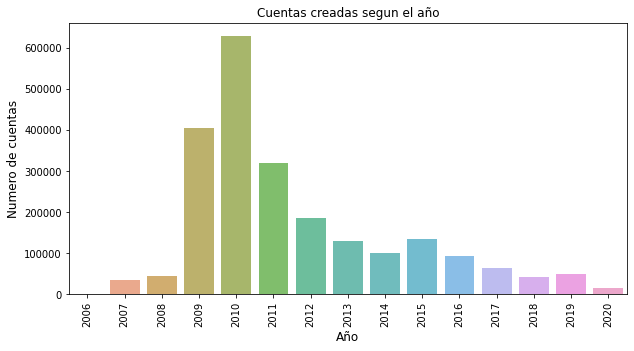

In [29]:
count_  = twitter_data['created_at_x'].dt.year.value_counts()
count_ = count_[:15,]
plt.figure(figsize=(10,5))
sns.barplot(count_.index, count_.values, alpha=0.8)
plt.title('Cuentas creadas segun el año')
plt.xticks(rotation='vertical')
plt.ylabel('Numero de cuentas', fontsize=12)
plt.xlabel('Año', fontsize=12)
plt.show()

In [30]:
from plotly.offline import  plot, iplot
twitter_data['tweeted_day_of_week'] = twitter_data['created_at_y'].dt.day_name()
twitter_data['user_created_day_of_week'] = twitter_data['created_at_x'].dt.day_name()
cnt_ = twitter_data['tweeted_day_of_week'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"% de tweets segun el dia de la semana",
        "annotations": [
            { "font": { "size": 20},
                 "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       348762
Monday       337625
Saturday     261199
Sunday       245812
Thursday     357058
Tuesday      350469
Wednesday    350753
Name: tweeted_day_of_week, dtype: int64

In [31]:
twitter_data['user_created_day_of_week'] = twitter_data['created_at_x'].dt.day_name()
cnt_ = twitter_data['user_created_day_of_week'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"% de cuentas creadas segun el dia de la semana",
        "annotations": [
            { "font": { "size": 20},
                 "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       335861
Monday       346406
Saturday     205309
Sunday       195138
Thursday     339734
Tuesday      474765
Wednesday    354465
Name: user_created_day_of_week, dtype: int64

Numero de tweets creados por hora

In [32]:
import plotly.graph_objs as go
twitter_data['created_at_hour'] = twitter_data['created_at_y'].dt.hour
cnt_ = twitter_data['created_at_hour'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Numero de tweets generados por hora',
              xaxis= dict(title= 'Tweets por hora',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [33]:
twitter_data['user_created_at_hour'] = twitter_data['created_at_x'].dt.hour
cnt_ = twitter_data['user_created_at_hour'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(210, 113, 25, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Numero de cuentas creadas por hora ',
              xaxis= dict(title= 'Cuentas por hora',ticklen= 5,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [104]:
df3=pd.read_csv('/content/retweets_202007072124.csv')
df3.head(2)

,tweet_owner,tweet_id,user_id,scrapped_at
0,140065192,1000000589944639488,187354449,2020-07-07 14:37:23.0
1,305764459,1000001099514990592,51714340,2020-07-07 09:58:20.0
